## Import

In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import pandas as pd
from root_numpy import array2tree
import scipy
import awkward
import numpy as np
import time
import math
#import PrettyTable

sys.path.append('/afs/desy.de/user/l/lbenato/cms-lpc-llp_repo/run3_muon_system_analysis/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot, addOverflow
from helper_functions import deltaR, deltaPhi, drawCMS

rt.gStyle.SetOptStat(0)
rt.gROOT.SetBatch(True)

Welcome to JupyROOT 6.24/06


/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
Info in <TCanvas::Print>: pdf file plots/ABCD_plane.pdf has been created
Info in <TCanvas::Print>: png file plots/ABCD_plane.png has been created


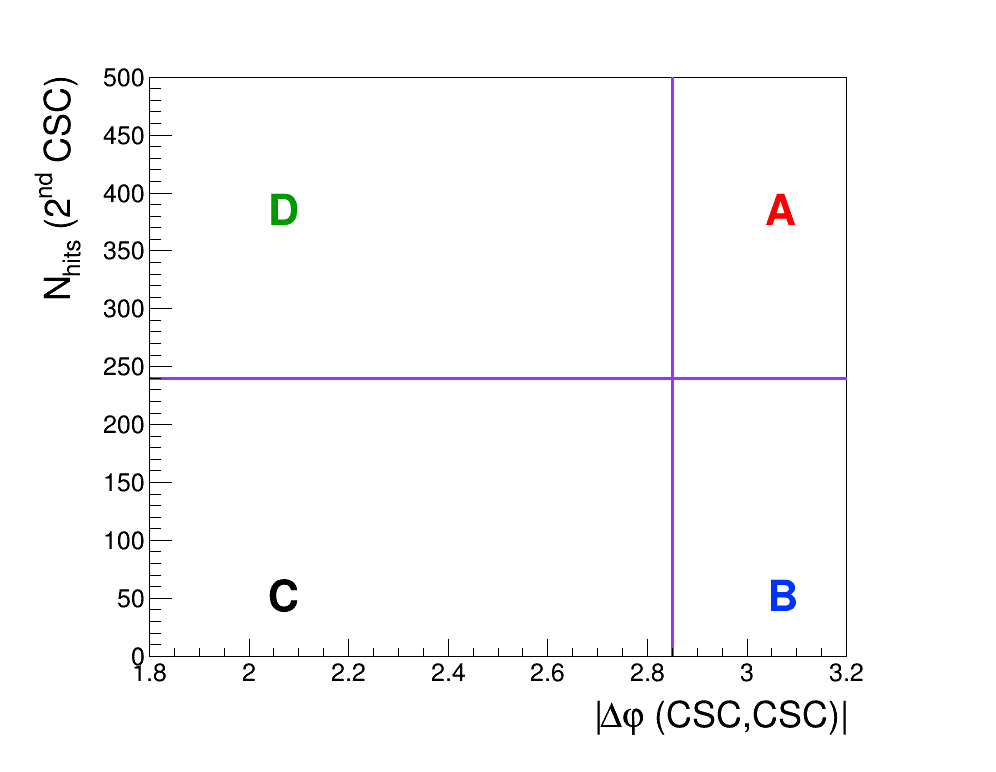

In [2]:
can = rt.TCanvas('c','c', 1000, 800)
can.cd()
can.SetRightMargin(0.15)
can.SetLeftMargin(0.15)
can.SetBottomMargin(0.15)

vec = np.array([-1,-1,-1])#np.zeros(6)
h = create_TH1D(vec,title="",axis_title = ['',''], binning=[10,1.8,3.2])#,bin_list=True)
h.GetXaxis().SetTitle("|#Delta#varphi (CSC,CSC)|")
h.GetYaxis().SetTitle("N_{hits} (2^{nd} CSC)")
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.05)
h.Draw("PE")
phi = rt.TLine(2.85,0.005,2.85,500)
phi.SetLineColor(881)
phi.SetLineStyle(1)
phi.SetLineWidth(3)
phi.Draw("L sames")
n = rt.TLine(1.8,240,3.2,240)
n.SetLineColor(881)
n.SetLineStyle(1)
n.SetLineWidth(3)
n.Draw("L sames")
h.SetMaximum(500)

latex = rt.TLatex()
latex.SetNDC()
latex.SetTextAlign(33)
latex.SetTextSize(0.06)
latex.SetTextFont(62)
latex.SetTextColor(2)
latex.DrawLatex(0.8,0.75, ("A"))
latex.SetTextColor(1)
latex.DrawLatex(0.3,0.25, ("C"))
latex.SetTextColor(860)
latex.DrawLatex(0.8,0.25, ("B"))
latex.SetTextColor(418)
latex.DrawLatex(0.3,0.75, ("D"))
rt.gPad.RedrawAxis()
can.Draw()
#drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)
can.Print("plots/ABCD_plane.pdf")
can.Print("plots/ABCD_plane.png")
#can.Close()

/nfs/dust/cms/user/lbenato/anaconda3/envs/run3/lib/python3.7/site-packages/root_numpy/_hist.py:76: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ROOT.AsCObject(hist), array, weights, return_indices)
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Info in <TCanvas::Print>: pdf file plots/ABCD_plane_scan.pdf has been created
Info in <TCanvas::Print>: png file plots/ABCD_plane_scan.png has been created


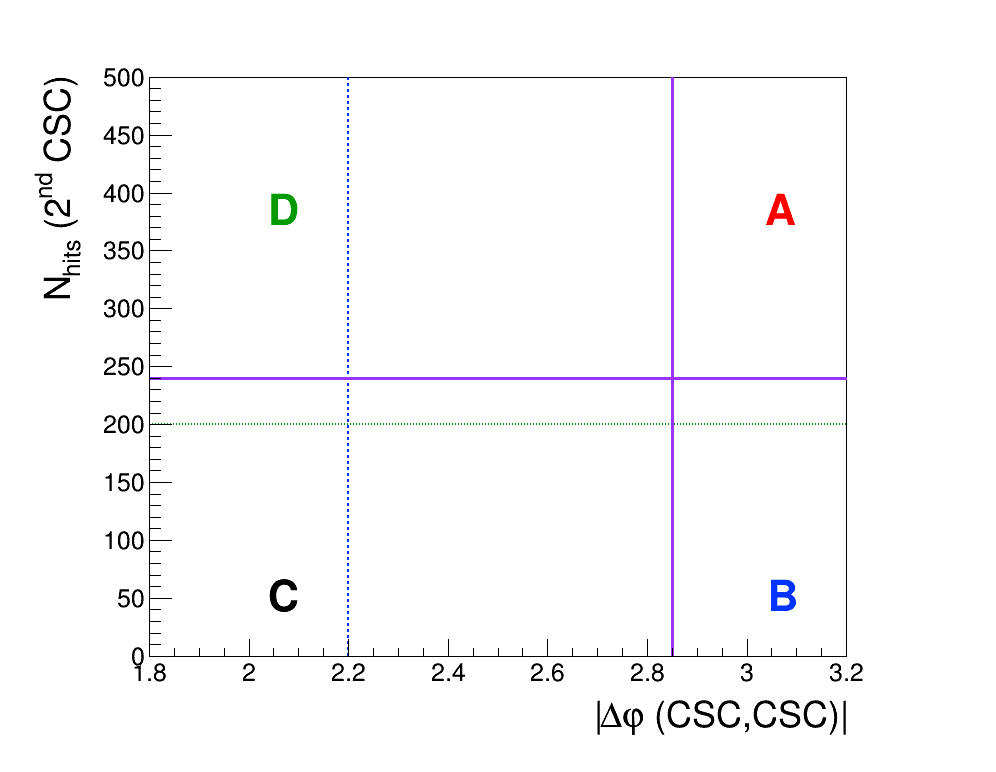

In [3]:
can = rt.TCanvas('c','c', 1000, 800)
can.cd()
can.SetRightMargin(0.15)
can.SetLeftMargin(0.15)
can.SetBottomMargin(0.15)

vec = np.array([-1,-1,-1])#np.zeros(6)
h = create_TH1D(vec,title="",axis_title = ['',''], binning=[10,1.8,3.2])#,bin_list=True)
h.GetXaxis().SetTitle("|#Delta#varphi (CSC,CSC)|")
h.GetYaxis().SetTitle("N_{hits} (2^{nd} CSC)")
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.05)
h.Draw("PE")


phis = rt.TLine(2.2,0.005,2.2,500)
phis.SetLineColor(860)
phis.SetLineStyle(2)
phis.SetLineWidth(2)
phis.Draw("L sames")
ns = rt.TLine(1.8,200,3.2,200)
ns.SetLineColor(418)
ns.SetLineStyle(3)
ns.SetLineWidth(2)
ns.Draw("L sames")

phi = rt.TLine(2.85,0.005,2.85,500)
phi.SetLineColor(881)
phi.SetLineStyle(1)
phi.SetLineWidth(3)
phi.Draw("L sames")
n = rt.TLine(1.8,240,3.2,240)
n.SetLineColor(881)
n.SetLineStyle(1)
n.SetLineWidth(3)
n.Draw("L sames")

h.SetMaximum(500)

latex = rt.TLatex()
latex.SetNDC()
latex.SetTextAlign(33)
latex.SetTextSize(0.06)
latex.SetTextFont(62)
latex.SetTextColor(2)
latex.DrawLatex(0.8,0.75, ("A"))
latex.SetTextColor(1)
latex.DrawLatex(0.3,0.25, ("C"))
latex.SetTextColor(860)
latex.DrawLatex(0.8,0.25, ("B"))
latex.SetTextColor(418)
latex.DrawLatex(0.3,0.75, ("D"))
rt.gPad.RedrawAxis()
can.Draw()
#drawCMS(lumi, "Preliminary", ERA="", onTop=True,left_marg_CMS=0.2,top_marg_cms=0.96,top_marg_lumi=0.965)
can.Print("plots/ABCD_plane_scan.pdf")
can.Print("plots/ABCD_plane_scan.png")
#can.Close()